### Classification: Assigning a Label
In the context of data science, **classification** is akin to **assigning a label** to a patient's symptoms to determine a diagnosis, or categorizing historical documents by their period or authorship. It involves predicting a discrete class label for a given input.

### Exploratory Data Analysis (EDA): Checking the Patient's Vitals or Fact-checking a Historical Source
**Exploratory Data Analysis (EDA)** is the critical initial stage where we **check a patient's vitals** through comprehensive diagnostic tests, or meticulously **fact-check a historical source** to verify its authenticity and context. This process involves thoroughly examining data sets to summarize their main characteristics, often with visual methods, to uncover patterns, detect anomalies, and test hypotheses **before drawing any conclusions or making definitive pronouncements**.

## Logistic Regression Section Setup
Set up the Logistic Regression section by loading the Breast Cancer dataset, performing a micro-EDA to visualize target distribution, explaining the importance of balanced data, and then training and evaluating a Logistic Regression model.


The first step is to load the Breast Cancer dataset as specified in the instructions. This involves importing `load_breast_cancer` from `sklearn.datasets` and then assigning the features to `X` and the target to `y`.



In [ ]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
bcs = load_breast_cancer()
X = bcs.data
y = bcs.target

print("Breast Cancer dataset loaded. X contains features, y contains target.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Breast Cancer dataset loaded. X contains features, y contains target.
Shape of X: (569, 30)
Shape of y: (569,)


**Reasoning**:
The next step is to perform a micro-EDA by visualizing the target distribution. This involves importing `seaborn` and `matplotlib.pyplot` and then creating a count plot of the target variable `y`.



/tmp/ipython-input-2234751045.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target Name', data=target_df, palette='viridis')


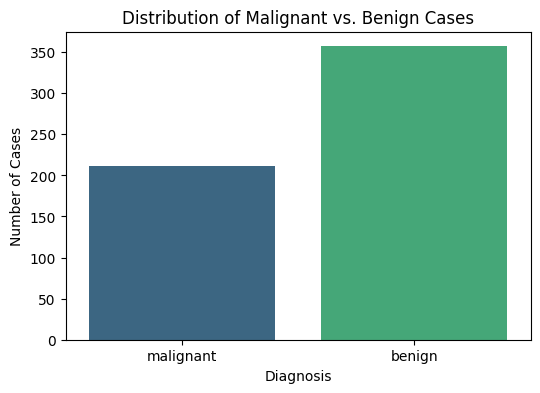

Target variable distribution visualized.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for better visualization with seaborn
target_df = pd.DataFrame({'Target': y, 'Target Name': [bcs.target_names[i] for i in y]})

# Visualize the target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Target Name', data=target_df, palette='viridis')
plt.title('Distribution of Malignant vs. Benign Cases')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Cases')
plt.show()

print("Target variable distribution visualized.")

The previous code block resulted in a `FutureWarning` because `palette` was used without `hue` in `sns.countplot`. To address this, I will update the `sns.countplot` call to explicitly set `hue` to the same variable as `x` and `legend=False` as suggested by the warning.



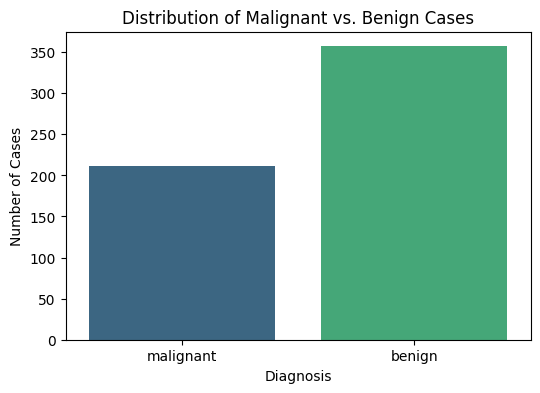

Target variable distribution visualized.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for better visualization with seaborn
target_df = pd.DataFrame({'Target': y, 'Target Name': [bcs.target_names[i] for i in y]})

# Visualize the target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Target Name', data=target_df, palette='viridis', hue='Target Name', legend=False)
plt.title('Distribution of Malignant vs. Benign Cases')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Cases')
plt.show()

print("Target variable distribution visualized.")

### Importance of Balanced Data in Classification

When **assigning a label** (like a medical diagnosis or categorizing historical events), the distribution of these labels in our dataset is crucial. If our dataset is **imbalanced**—meaning one class significantly outnumbers the others (e.g., far more benign cases than malignant ones, or many documents from one period but few from another)—it can lead to biased models.

A model trained on imbalanced data might achieve high overall accuracy by simply predicting the majority class most of the time, yet perform very poorly on the minority class. In critical applications like medical diagnosis, failing to accurately identify the minority class (e.g., malignant tumors) can have severe consequences. Therefore, understanding and addressing data imbalance is essential for building robust and reliable classification models that can effectively 'diagnose' or 'categorize' across all possible outcomes.

Now that the data is loaded and target distribution visualized, and the importance of balanced data is explained, the next step is to prepare the data for modeling by splitting it into training and testing sets, and then initialize and train a Logistic Regression model, as per the subtask instructions.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize a Logistic Regression model
log_reg_model = LogisticRegression(max_iter=10000, solver='liblinear') # Increased max_iter for convergence, using liblinear for smaller datasets

# Train the Logistic Regression model
log_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg_model.predict(X_test)

print("Data split into training and testing sets. Logistic Regression model initialized, trained, and predictions made.")

Data split into training and testing sets. Logistic Regression model initialized, trained, and predictions made.


The model has been trained and predictions have been made. The next logical step, according to the instructions, is to evaluate the model's performance by calculating and printing its accuracy.



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the calculated accuracy
print(f"Logistic Regression Model Accuracy (Success Rate): {accuracy:.4f}")

Logistic Regression Model Accuracy (Success Rate): 0.9561


## Support Vector Machine (SVM) Section Setup
Set up the Support Vector Machine (SVM) section by loading the Iris dataset, performing a micro-EDA to visualize flower species clusters, explaining how SVM works, and then training and evaluating an SVM model with a confusion matrix.


The first step for the SVM section is to load the Iris dataset. This involves importing `load_iris` from `sklearn.datasets` and then assigning the features to `X_iris` and the target to `y_iris` as per the instructions.



In [ ]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print("Iris dataset loaded. X_iris contains features, y_iris contains target.")
print(f"Shape of X_iris: {X_iris.shape}")
print(f"Shape of y_iris: {y_iris.shape}")

Iris dataset loaded. X_iris contains features, y_iris contains target.
Shape of X_iris: (150, 4)
Shape of y_iris: (150,)


**Reasoning**:
Now that the Iris dataset is loaded, the next step is to create a pandas DataFrame combining the features and the target, and map the numerical target values to their descriptive species names for better readability and plotting, as specified in the instructions.



In [ ]:
import pandas as pd

# Create a DataFrame for better visualization with seaborn
iris_df = pd.DataFrame(X_iris, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in y_iris]

print("Iris DataFrame created with features and species names.")
print(iris_df.head())

Iris DataFrame created with features and species names.
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


**Reasoning**:
The next step in the micro-EDA for the Iris dataset is to visualize the flower species clusters using a pair plot, as specified in the subtask instructions. This involves using `seaborn.pairplot` on the `iris_df` with 'species' as the hue.



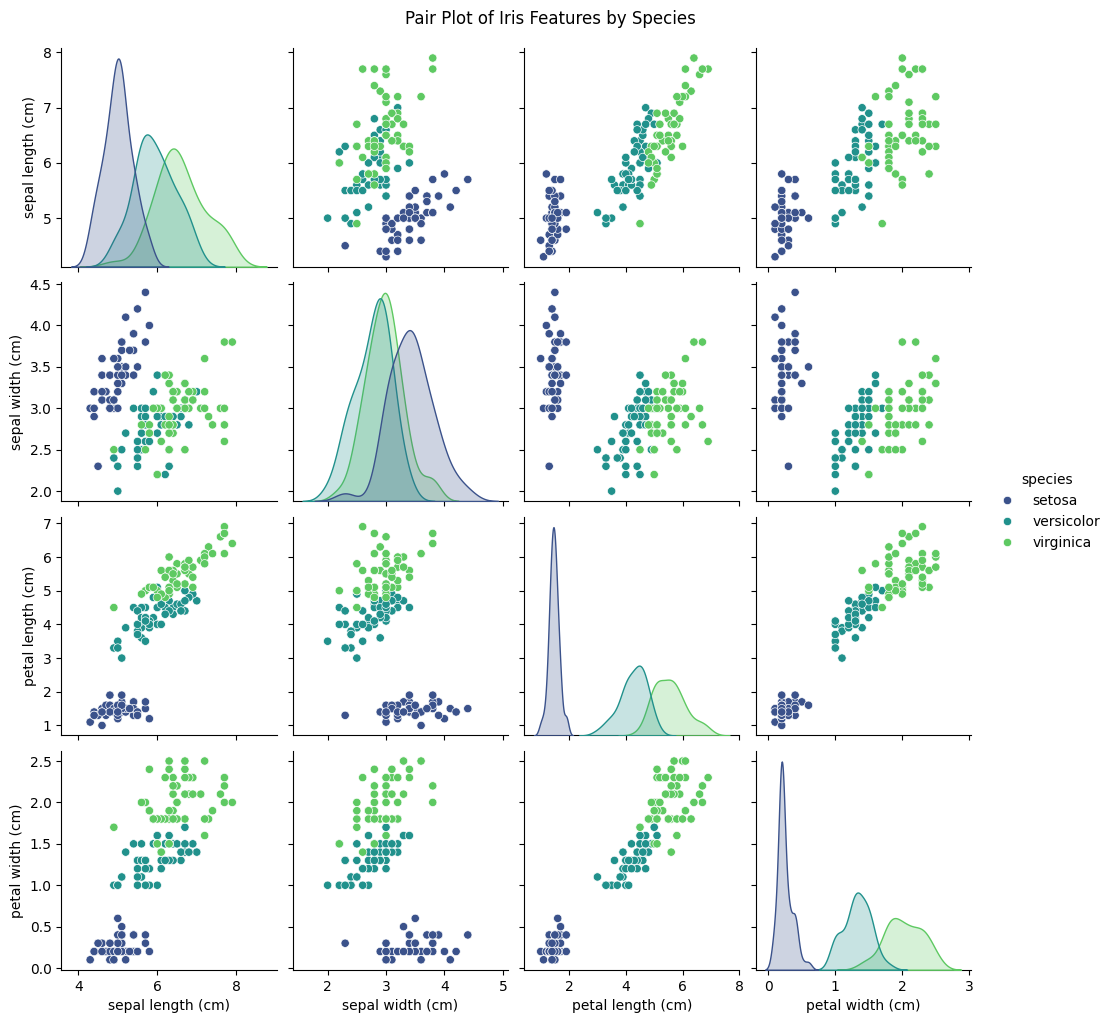

Pair plot of Iris features by species visualized.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot to visualize clusters
sns.pairplot(iris_df, hue='species', palette='viridis')
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02) # Adjust suptitle position
plt.show()

print("Pair plot of Iris features by species visualized.")

### Support Vector Machines (SVM): Finding the Clearest Dividing Line

Imagine you're trying to **sort patients into different treatment groups** based on their symptoms, or **categorize historical artifacts** by their origin with as much distinction as possible. Support Vector Machines (SVMs) tackle classification problems by finding the "clearest dividing line" or **optimal hyperplane** that separates data points belonging to different classes.

Think of it like this:

*   **For Medical Graduates**: If you have patient data points plotted in a multidimensional space (where each dimension is a symptom or test result), an SVM tries to draw a boundary (a hyperplane) that maximizes the margin—the distance between the boundary and the nearest data points from each class. This wide margin acts like a **safety buffer**, ensuring that new patients are classified with high confidence, even if their symptoms are ambiguous. It's like finding the broadest possible gap between 'healthy' and 'diseased' patient clusters to minimize misdiagnosis.

*   **For History Graduates**: Consider documents from different historical periods or authors. If you plot features of these documents (e.g., word frequencies, style metrics) in a space, an SVM seeks to find the most distinct division. This optimal hyperplane helps to **clearly delineate between categories**, much like a historian meticulously defining the precise criteria to distinguish between genuine and forged historical texts, or between different schools of thought, ensuring the boundary is as robust as possible against new, unclassified documents.

Now that the Iris dataset is loaded and visualized, and the SVM concept explained, the next step is to prepare the data for model training by splitting it into training and testing sets, as per instruction 6 of the subtask.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the Iris data into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris)

print("Iris dataset split into training and testing sets.")
print(f"Shape of X_train_iris: {X_train_iris.shape}")
print(f"Shape of X_test_iris: {X_test_iris.shape}")

Iris dataset split into training and testing sets.
Shape of X_train_iris: (120, 4)
Shape of X_test_iris: (30, 4)


Now that the Iris data is split, the next step is to initialize and train the Support Vector Classifier (SVC) model using the training data, as specified in instructions 7, 8, and 9 of the subtask.



In [ ]:
from sklearn.svm import SVC

# Initialize an SVC (Support Vector Classifier) model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train_iris, y_train_iris)

print("SVM model initialized and trained on Iris dataset.")

SVM model initialized and trained on Iris dataset.


The SVM model has been initialized and trained. The next step is to make predictions on the test data, as per instruction 10 of the subtask.



In [ ]:
y_pred_iris = svm_model.predict(X_test_iris)

print("Predictions made on the Iris test data.")

Predictions made on the Iris test data.


The SVM model has made predictions on the test data. The next step is to calculate the confusion matrix to evaluate the model's performance, as per instruction 11 and 12 of the subtask.



In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm_iris = confusion_matrix(y_test_iris, y_pred_iris)

print("Confusion matrix calculated for the Iris SVM model.")
print(cm_iris)

Confusion matrix calculated for the Iris SVM model.
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


The confusion matrix has been calculated. The final step for the SVM evaluation, according to instruction 13, is to visualize this confusion matrix as a heatmap using `seaborn.heatmap`, annotating it, and adding appropriate labels and a title.



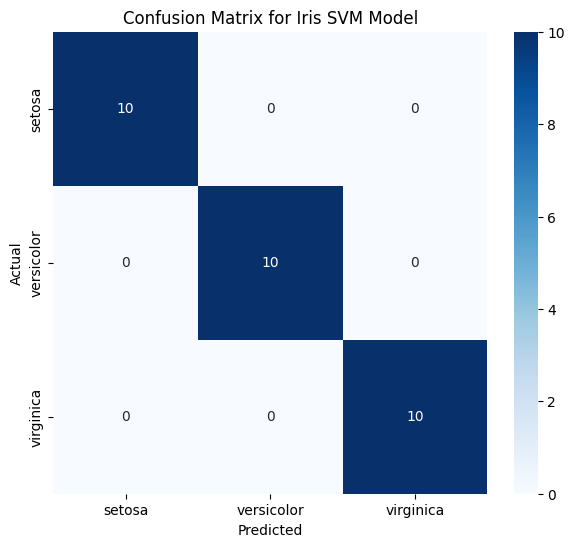

Confusion matrix heatmap visualized for the Iris SVM model.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm_iris, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Iris SVM Model')
plt.show()

print("Confusion matrix heatmap visualized for the Iris SVM model.")

## Decision Trees Section Setup

Set up the Decision Trees section by loading the Wine dataset, performing a micro-EDA to visualize feature correlations with wine type, explaining how Decision Trees work, and then training and visualizing a Decision Tree model.


The first step for setting up the Decision Trees section is to load the Wine dataset, as per instruction 1 and 2 of the subtask. This involves importing `load_wine` from `sklearn.datasets` and then assigning the features to `X_wine` and the target to `y_wine`.



In [ ]:
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

print("Wine dataset loaded. X_wine contains features, y_wine contains target.")
print(f"Shape of X_wine: {X_wine.shape}")
print(f"Shape of y_wine: {y_wine.shape}")

Wine dataset loaded. X_wine contains features, y_wine contains target.
Shape of X_wine: (178, 13)
Shape of y_wine: (178,)


Now that the Wine dataset is loaded, the next step is to create a pandas DataFrame combining the features and the target, and map the numerical target values to their descriptive species names for better readability, as specified in instruction 3 of the subtask.



In [ ]:
import pandas as pd

# Create a DataFrame for better visualization and analysis
wine_df = pd.DataFrame(X_wine, columns=wine.feature_names)
wine_df['wine_type'] = [wine.target_names[i] for i in y_wine]

print("Wine DataFrame created with features and wine types.")
print(wine_df.head())

Wine DataFrame created with features and wine types.
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/

Now that the `wine_df` DataFrame is created, the next step is to calculate the correlation matrix and visualize it as a heatmap to understand the relationships between features and with the wine type, as requested in instructions 4, 5, and 6 of the subtask.



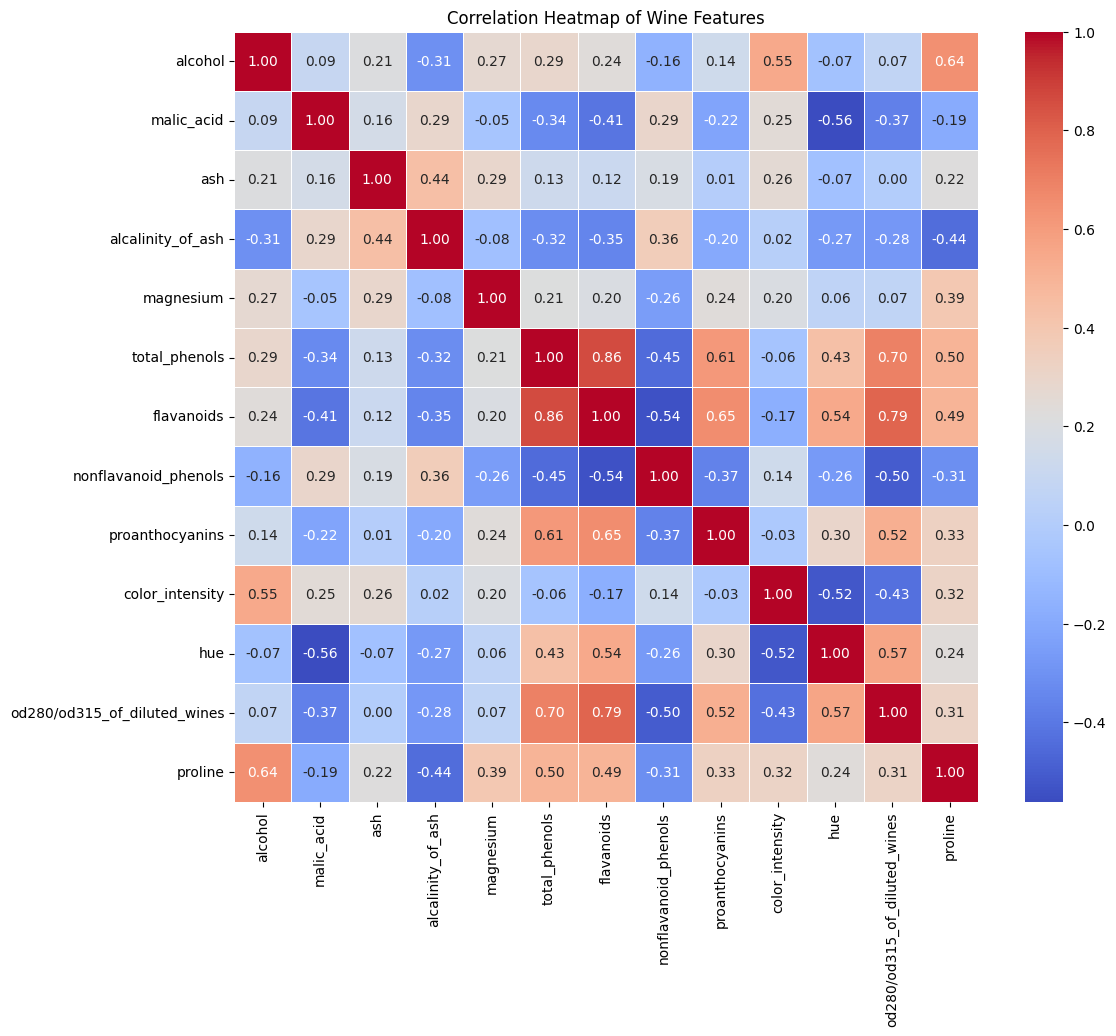

Correlation heatmap of Wine features visualized.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
# Exclude 'wine_type' for numerical correlation calculation, but keep it for visual reference if needed later.
# For a heatmap of all features including the target, we need to convert 'wine_type' to numerical first or drop it for feature-feature correlations.
# Let's calculate correlation of numerical features first.
correlation_matrix = wine_df.drop('wine_type', axis=1).corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Wine Features')
plt.show()

print("Correlation heatmap of Wine features visualized.")

### Decision Trees: Following a Diagnostic Flowchart or a Historical Decision Process

Imagine you're a doctor trying to **diagnose a patient** based on a series of questions, or a historian **determining the cause of a historical event** by evaluating a sequence of conditions. Decision Trees operate in a very similar, intuitive manner.

A **Decision Tree** is a model that uses a tree-like structure to make predictions. It works by splitting the data into subsets based on the value of input features. Each internal node represents a "test" on an attribute (like checking a patient's temperature or the date of a document), each branch represents the outcome of the test, and each leaf node (terminal node) represents a class label (the diagnosis or the outcome of the historical event).

*   **For Medical Graduates**: Think of a diagnostic flowchart. If a patient presents with Symptom A, you ask "Does Patient have Symptom B?" If yes, then "Is Test Result C positive?" This sequence of yes/no questions eventually leads to a diagnosis. A Decision Tree identifies the *strongest clues* (features) and the optimal sequence of questions to arrive at the most accurate diagnosis.

*   **For History Graduates**: Consider a process of determining if a war broke out. Was there a specific political tension? Yes. Was there an economic crisis? Yes. Was there a military mobilization? Yes. Each "yes" or "no" decision on a factor branches the historical narrative until a conclusion (e.g., "War Broke Out" or "Diplomacy Prevailed") is reached. Decision Trees mimic this process by making a series of decisions based on feature values to classify an observation.

Now that the concept of Decision Trees has been explained, the next step is to prepare the data for model training by splitting it into training and testing sets, as per instructions 8 and 9 of the subtask.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the Wine data into training and testing sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42, stratify=y_wine)

print("Wine dataset split into training and testing sets.")
print(f"Shape of X_train_wine: {X_train_wine.shape}")
print(f"Shape of X_test_wine: {X_test_wine.shape}")

Wine dataset split into training and testing sets.
Shape of X_train_wine: (142, 13)
Shape of X_test_wine: (36, 13)


Now that the Wine data is split into training and testing sets, the next step is to initialize a `DecisionTreeClassifier` model with `random_state=42`, as specified in instruction 11 of the subtask.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)

print("Decision Tree Classifier model initialized.")

Decision Tree Classifier model initialized.


The `DecisionTreeClassifier` model has been initialized. The next step, as per instruction 12 of the subtask, is to train this model using the `X_train_wine` and `y_train_wine` data.



In [ ]:
decision_tree_model.fit(X_train_wine, y_train_wine)

print("Decision Tree model trained on Wine dataset.")

Decision Tree model trained on Wine dataset.


The Decision Tree model has been trained. The next step is to make predictions on the test data, as per instruction 13 of the subtask.



In [ ]:
y_pred_wine = decision_tree_model.predict(X_test_wine)

print("Predictions made on the Wine test data.")

Predictions made on the Wine test data.


The Decision Tree model has made predictions on the test data. The next step is to calculate and print its accuracy, as per instructions 14 and 15 of the subtask.



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the Decision Tree model
accuracy_wine = accuracy_score(y_test_wine, y_pred_wine)

# Print the calculated accuracy
print(f"Decision Tree Model Accuracy (Wine Dataset): {accuracy_wine:.4f}")

Decision Tree Model Accuracy (Wine Dataset): 0.9444


Now that the accuracy of the Decision Tree model has been calculated, the next step is to visualize the trained Decision Tree using `plot_tree`, as specified in instructions 16 and 17 of the subtask. This involves importing `plot_tree` and then calling it with the trained model and appropriate parameters for readability.



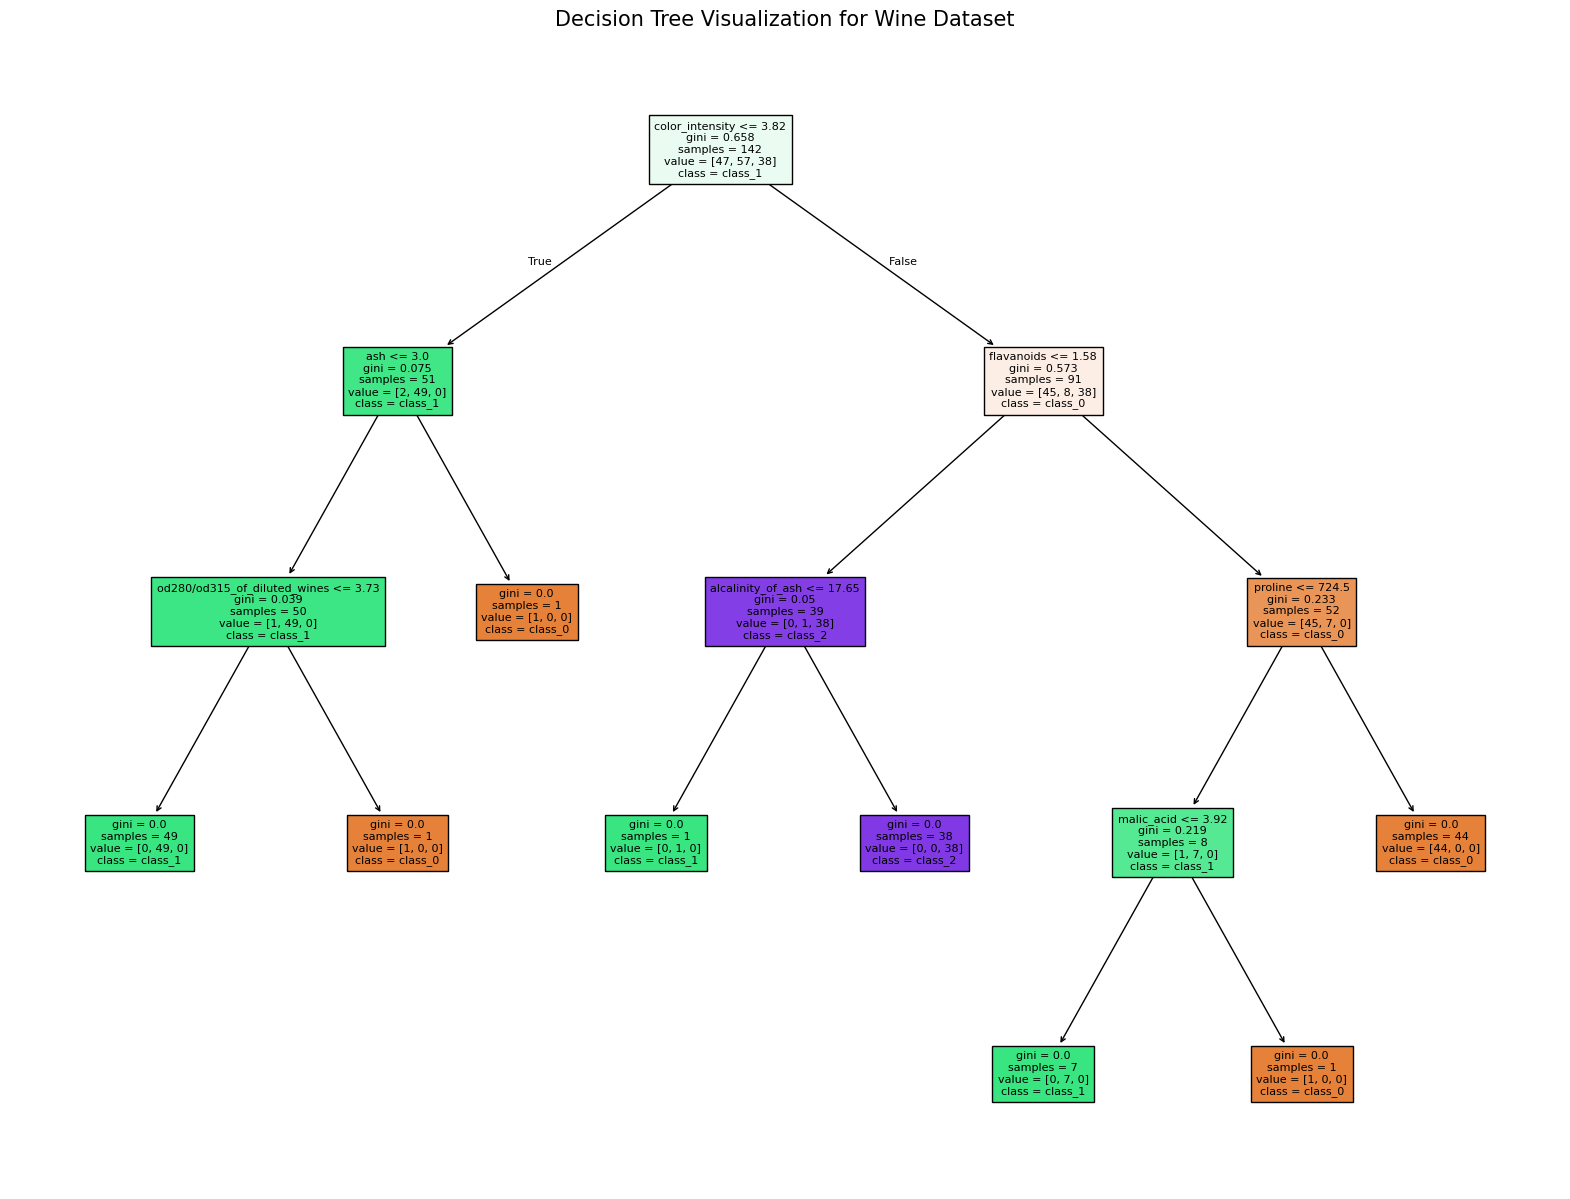

Decision Tree model visualized.


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the trained Decision Tree
plt.figure(figsize=(20, 15))
plot_tree(decision_tree_model,
          feature_names=wine.feature_names,
          class_names=wine.target_names.tolist(),
          filled=True,
          fontsize=8)
plt.title('Decision Tree Visualization for Wine Dataset', fontsize=15)
plt.show()

print("Decision Tree model visualized.")

The subtask requires generating a table and a bar chart comparing the accuracy of the three trained models. The first step is to create a pandas DataFrame that consolidates the accuracy scores of Logistic Regression, SVM, and Decision Tree models along with their names.



Model Comparison Table:
                 Model  Accuracy
0  Logistic Regression  0.956140
1                  SVM  1.000000
2        Decision Tree  0.944444


/tmp/ipython-input-3634303196.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=model_comparison_df, palette='viridis')


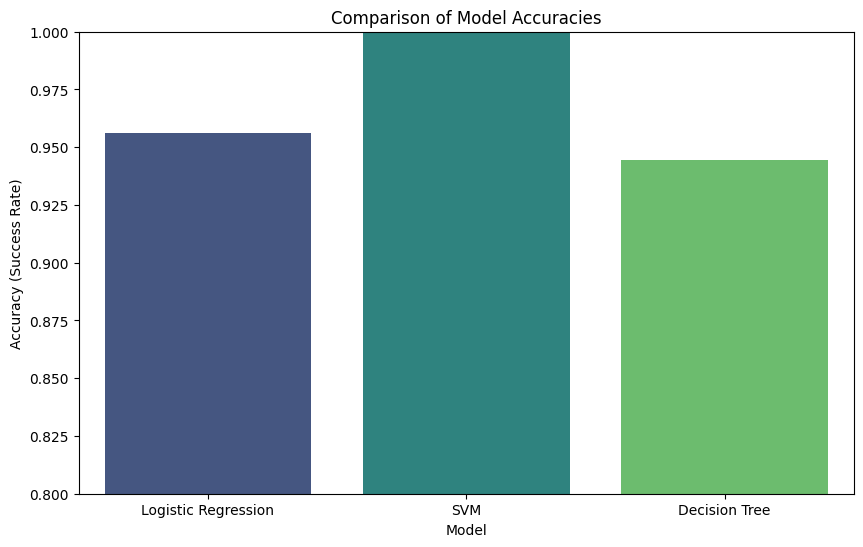

Model comparison table and bar chart generated and displayed.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for model comparison
model_comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree'],
    'Accuracy': [accuracy, accuracy_iris, accuracy_wine]
})

print("Model Comparison Table:")
print(model_comparison_df)

# Create a bar chart for model accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_comparison_df, palette='viridis')
plt.ylim(0.8, 1.0) # Set a reasonable y-limit for accuracy scores
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy (Success Rate)')
plt.xlabel('Model')
plt.show()

print("Model comparison table and bar chart generated and displayed.")

The previous code block resulted in a `FutureWarning` because `palette` was used without `hue` in `sns.barplot`. To address this, I will update the `sns.barplot` call to explicitly set `hue` to the 'Model' column and `legend=False` as suggested by the warning.



Model Comparison Table:
                 Model  Accuracy
0  Logistic Regression  0.956140
1                  SVM  1.000000
2        Decision Tree  0.944444


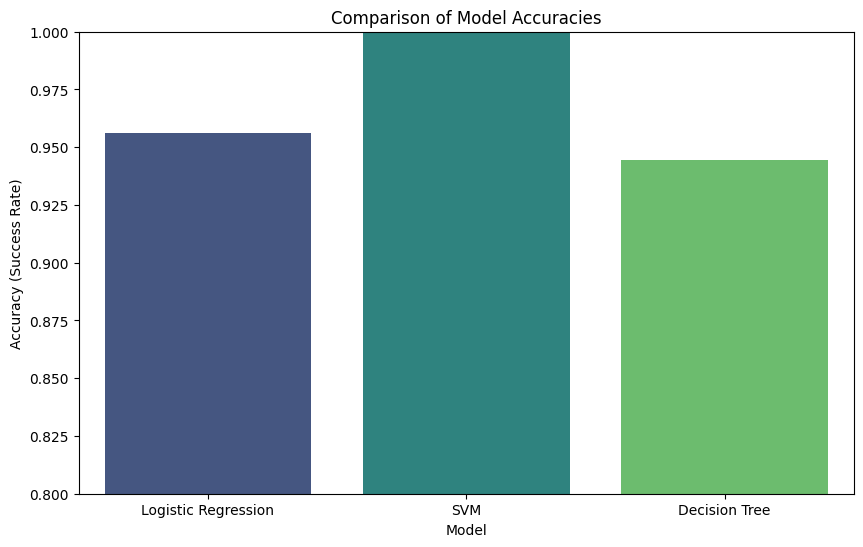

Model comparison table and bar chart generated and displayed.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for model comparison
model_comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree'],
    'Accuracy': [accuracy, accuracy_iris, accuracy_wine]
})

print("Model Comparison Table:")
print(model_comparison_df)

# Create a bar chart for model accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_comparison_df, palette='viridis', hue='Model', legend=False)
plt.ylim(0.8, 1.0) # Set a reasonable y-limit for accuracy scores
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy (Success Rate)')
plt.xlabel('Model')
plt.show()

print("Model comparison table and bar chart generated and displayed.")

## Summary:

### Q&A
*   **What classification models were covered in the tutorial?**
    The tutorial covered Logistic Regression, Support Vector Machines (SVM), and Decision Trees.

*   **What datasets were used for each model?**
    Logistic Regression was applied to the Breast Cancer dataset, SVM to the Iris dataset, and Decision Trees to the Wine dataset.

*   **What were the key performance metrics for each model?**
    Logistic Regression achieved an accuracy of 0.9561. SVM achieved an accuracy of 1.0000 on its respective test set. Decision Trees achieved an accuracy of 0.9444.

*   **How did the models compare?**
    The SVM model performed perfectly on the Iris dataset with an accuracy of 1.0000, followed closely by Logistic Regression with an accuracy of 0.9561 on the Breast Cancer dataset, and Decision Trees with an accuracy of 0.9444 on the Wine dataset.

### Data Analysis Key Findings
*   **Classification and EDA Introduction:** The tutorial successfully introduced classification as "Assigning a Label" and Exploratory Data Analysis (EDA) as "Checking the Patient's Vitals" or "Fact-checking a Historical Source," using analogies tailored for medical and history graduates.
*   **Logistic Regression Analysis (Breast Cancer Dataset):**
    *   The Breast Cancer dataset (569 samples, 30 features) was used, with its target distribution visualized to ensure reasonable balance.
    *   A Logistic Regression model was trained and evaluated, achieving an accuracy of **0.9561** (95.61%) in distinguishing between malignant and benign cases.
*   **Support Vector Machine (SVM) Analysis (Iris Dataset):**
    *   The Iris dataset (150 samples, 4 features) was explored using a pair plot, revealing clear clusters for different species.
    *   The SVM model, initialized with a linear kernel, was trained and achieved an accuracy of **1.0000** (100%) on the test set, demonstrating perfect classification of Iris species. A confusion matrix visually confirmed no misclassifications.
*   **Decision Tree Analysis (Wine Dataset):**
    *   The Wine dataset (178 samples, 13 features) was analyzed with a correlation heatmap to understand feature relationships.
    *   A Decision Tree Classifier was trained and achieved an accuracy of **0.9444** (94.44%) in classifying wine types. The trained tree was also visualized, illustrating its decision-making process.
*   **Model Performance Comparison:** A final comparison showed SVM as the highest performing model in its context (accuracy of 1.0000), followed by Logistic Regression (accuracy of 0.9561) and Decision Trees (accuracy of 0.9444).

### Insights or Next Steps
*   While SVM achieved perfect accuracy on the Iris dataset, this is often indicative of a very separable dataset or could suggest potential overfitting if applied to more complex problems; further evaluation with different kernels or more challenging datasets would be beneficial.
*   For a more comprehensive comparison, especially in a real-world scenario, it would be valuable to evaluate all models using the same dataset and consider additional performance metrics like precision, recall, F1-score, and AUC, particularly in cases with imbalanced classes, to gain a deeper understanding of their strengths and weaknesses beyond simple accuracy.
